### loading the needed packages

In [ ]:
# load the packages
import xarray as xr
import pandas as pd
import numpy  as np
from datetime import date
from datetime import datetime
import os
import shutil
import glob
#import datetime #import date
import matplotlib.pyplot  as plt
import matplotlib as mpl
#from ipynb.fs.full.Untitled2 import save_netcdf
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 24}
font = {'family' : 'Nimbus Roman',
        'weight' : 'bold',
        'size'   : 36}
# matplotlib.rcs('font', **font)
plt.rc('font', **font)
import random
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### Figure for water level, storgae and discharge at saskatoon streamflow 

In [ ]:
# Create the figure and gridspec
#fig = plt.figure(figsize=(30, 7))
#gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

# Create the subplots using gridspec
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
ax3 = plt.subplot(gs[2], sharex=ax1)

# parameters
linewidth = 5

#########
### Water Level Scenarios
#########
# Read the data for elevation of the lake Diefenbaker
elevation_ens = pd.read_csv('../data/ensemble/Level_ensemble_Scenarios.csv')
elevation_ens ['DATE'] = pd.to_datetime(elevation_ens ['DATE'])
elevation_ens.set_index('DATE', inplace=True)
elevation_ens = elevation_ens ['2013-06-15':'2013-06-30']

# Create the plot
elevation_ens.plot(ax =ax1, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax1.plot(elevation_ens['05HF003'], label = 'Historical', linewidth=linewidth)
l2 = ax1.plot(elevation_ens['scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax1.plot(elevation_ens['scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax1.plot(elevation_ens['scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
#ax1.set_title('(a) Water Level Scenarios')
ax1.text(0.05, 0.95, '(a)', transform=ax1.transAxes, va='top', fontsize=40)

# Add tickes
ax1.set_xlabel('   ')
ax1.set_ylabel('Lake Diefenbaker \n Level [m AMSL]')

# 
ax1.grid(True, which='both', axis='both')
#ax1.set_xticklabels([])
#ax1.set_xticklabels(ax1.get_xticks(), visible=False)
#ax1.set_xticklabels(visible=False)

# 
ax1.legend(handles=[l1[0], l2[0], l3[0], l4[0]], loc = 'lower left', fontsize = 20)


#########
### Water Storage Scenarios
#########
# Read the data for elevation of the lake Diefenbaker
storage_ens = pd.read_csv('../data/ensemble/Storage_ensemble_Scenarios.csv')
storage_ens ['DATE'] = pd.to_datetime(storage_ens ['DATE'])
storage_ens.set_index('DATE', inplace=True)
storage_ens = storage_ens ['2013-06-15':'2013-06-30']

# Create the plot
storage_ens.plot(ax =ax2, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax2.plot(storage_ens['05HF003'], label = 'Historical Storage', linewidth=linewidth)
l2 = ax2.plot(storage_ens['scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax2.plot(storage_ens['scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax2.plot(storage_ens['scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
#ax2.set_title('(b) Storage Scenarios')
ax2.text(0.05, 0.95, '(b)', transform=ax2.transAxes, va='top', fontsize=40)

# Add tickes
ax2.set_xlabel('   ')
ax2.set_ylabel('Lake Diefenbaker \n Storage [m\u00b3]')

# 
ax2.grid(True, which='both', axis='both')
ax2.set_xticklabels([])

# 
ax2.legend().remove()


#########
### Discharge at Saskatoon
#########
# Read the data for elevation of the lake Diefenbaker
discharge_ens = pd.read_csv('../data/ensemble/scenarios_of_river_flow_at_Saskatoon.csv')
discharge_ens = discharge_ens.drop(columns=['Unnamed: 0'])
discharge_ens ['DATE'] = pd.to_datetime(discharge_ens ['DATE'])
discharge_ens.set_index('DATE', inplace=True)
discharge_ens = discharge_ens ['2013-06-15':'2013-06-30']
#
discharge_obs = pd.read_csv('../data/HYDAT/05HG001_flow.csv')
discharge_obs ['DATE'] = pd.to_datetime(discharge_obs ['DATE'])
discharge_obs.set_index('DATE', inplace=True)
discharge_obs = discharge_obs ['2013-06-15':'2013-06-30']


# Create the plot
discharge_ens.plot(ax =ax3, label = '_nolegend_', linewidth=linewidth/10, c='grey', alpha=0.1)
l1 = ax3.plot(discharge_obs, label = 'Historical Storage', linewidth=linewidth)
l2 = ax3.plot(discharge_ens['./output/scenario_15_23_26_0.5'], label = 'Scenario-15-23-26-0.5', linewidth=linewidth)
l3 = ax3.plot(discharge_ens['./output/scenario_18_25_28_1.0'], label = 'Scenario-18-25-28-1.0', linewidth=linewidth)
l4 = ax3.plot(discharge_ens['./output/scenario_18_24_28_1.5'], label = 'Scenario-18-24-28-1.5', linewidth=linewidth)

# Create the plot
#ax3.set_title('(c) Discharge Scenarios at Saskatoon')
ax3.text(0.05, 0.95, '(c)', transform=ax3.transAxes, va='top', fontsize=40)

# Add tickes
ax3.set_xlabel('   ')
ax3.set_ylabel('Streamflow at \n Saskatoon [m\u00b3 / s]')

# 
ax3.grid(True, which='both', axis='both')

# 
ax3.legend().remove()

#
ax3.set_ylim(0,4000)

#
plt.tight_layout()
# plt.savefig('../fig/figure.png',dpi=300)
plt.savefig('../fig/figure.pdf')




In [3]:
####
# put out the scenarios
####

print('maximume values of discharge historical', discharge_obs.max())

print('scenarios for lowest discharge at Saskatoon', discharge_ens.max().sort_values())

print('reduction in discharge at Saskatoon: ', discharge_obs.max()-discharge_ens.max().sort_values().iloc[0] )


maximume values of discharge historical 05HG001    2240.0
dtype: float64
scenarios for lowest discharge at Saskatoon ./output/scenario_15_23_29_0.75    1755.0650
./output/scenario_15_23_30_0.75    1771.0037
./output/scenario_15_23_28_0.75    1788.0206
./output/scenario_16_23_28_0.75    1791.2015
./output/scenario_16_23_29_0.75    1806.6039
                                     ...    
./output/scenario_22_25_27_1.5     3726.6829
./output/scenario_22_24_29_1.5     3729.7803
./output/scenario_22_24_30_1.5     3768.3489
./output/scenario_22_25_29_1.5     3844.8435
./output/scenario_22_25_30_1.5     3917.9321
Length: 1246, dtype: float64
reduction in discharge at Saskatoon:  05HG001    484.935
dtype: float64


1920.0853

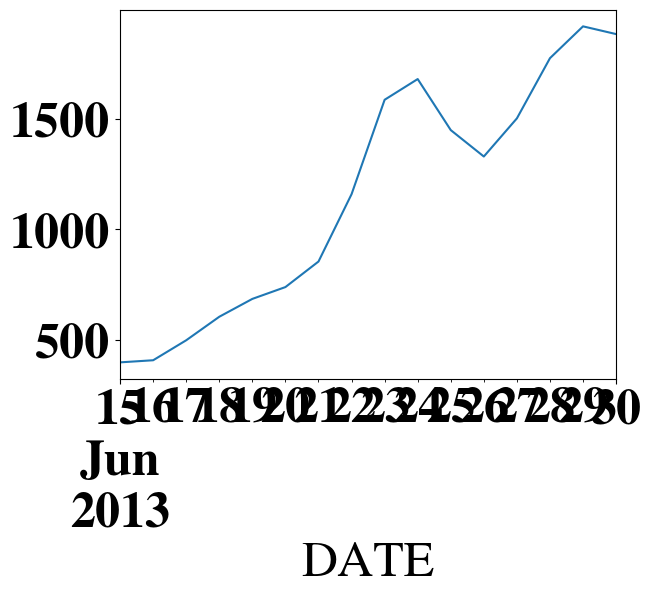

In [4]:
discharge_ens['./output/scenario_15_23_30_0.5'].plot()
discharge_ens['./output/scenario_15_23_30_0.5'].max()